In [1]:
import torch,torchaudio

In [2]:
"""model = torch.hub.load("kaiidams/soundstream-pytorch", "soundstream_16khz")
x, sr = torchaudio.load('/ari/users/ibaskaya/projeler/sstream/data/testdata/908_157963_908-157963-0028.in.wav')
x, sr = torchaudio.functional.resample(x, sr, 16000), 16000
with torch.no_grad():
    y = model.encode(x)
    # y = y[:, :, :4]  # if you want to reduce code size.
    z = model.decode(y)
torchaudio.save('/ari/users/ibaskaya/projeler/sstream/data/testdata/outputs/output.wav', z, sr)"""

'model = torch.hub.load("kaiidams/soundstream-pytorch", "soundstream_16khz")\nx, sr = torchaudio.load(\'/ari/users/ibaskaya/projeler/sstream/data/testdata/908_157963_908-157963-0028.in.wav\')\nx, sr = torchaudio.functional.resample(x, sr, 16000), 16000\nwith torch.no_grad():\n    y = model.encode(x)\n    # y = y[:, :, :4]  # if you want to reduce code size.\n    z = model.decode(y)\ntorchaudio.save(\'/ari/users/ibaskaya/projeler/sstream/data/testdata/outputs/output.wav\', z, sr)'

In [2]:
#from quadbig import StreamableModel
from quadsingletrain import StreamableModel
cp = '/ari/users/ibaskaya/projeler/sstream/lightning_logs/version_78/checkpoints/last.ckpt'
#cp = '/ari/users/ibaskaya/projeler/sstream/lightning_logs/version_77/checkpoints/best-g_loss-epoch=886-g_loss_4save=19.2346.ckpt'

model = StreamableModel(
        batch_size=32,
        sample_rate=24_000,
        segment_length=11790,
        padding='same',
        dataset='librispeech')
model.load_state_dict(torch.load(cp,'cpu')['state_dict'])
_ = model.eval()

/ari/users/ibaskaya/.local/lib/python3.12/site-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/tmp/ipykernel_3054866/84667870.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True`

In [3]:
x, sr = torchaudio.load('/ari/users/ibaskaya/projeler/sstream/data/testdata/908_157963_908-157963-0028.in.wav')
x, sr = torchaudio.functional.resample(x, sr, 24000), 24000
x = x.unsqueeze(dim=1)
with torch.no_grad():
    b = model(x)
    y = model.encode(x)
    # y = y[:, :, :4]  # if you want to reduce code size.
    z = model.decode(y)
torchaudio.save('/ari/users/ibaskaya/projeler/sstream/data/testdata/outputs/outputz78.wav', z.squeeze(dim=1), sr)
torchaudio.save('/ari/users/ibaskaya/projeler/sstream/data/testdata/outputs/outputb78.wav', b.squeeze(dim=1), sr)

In [8]:
b.shape

torch.Size([1, 1, 78990])

In [7]:
79280/248

319.6774193548387

In [6]:
model.embed.embeddings_r1.shape

torch.Size([256, 512])

In [7]:
model.embed.embeddings.shape

torch.Size([256, 512])

In [5]:
import torch.nn.functional as F
codes_main = codes[:,0,:].long()
codes_r1 = codes[:,1,:].long()
decoded_main = F.embedding(codes_main, model.embed.embeddings)
decoded_r1 = F.embedding(codes_r1, model.embed.embeddings_r1)
decoded_main = decoded_main.permute(0, 2, 1).contiguous()
decoded_r1 = decoded_r1.permute(0, 2, 1).contiguous()
decoded = decoded_main+decoded_r1

IndexError: index out of range in self

In [10]:
x, sr = torchaudio.load('/ari/users/ibaskaya/projeler/sstream/data/testdata/908_157963_908-157963-0028.in.wav')
x, sr = torchaudio.functional.resample(x, sr, 16000), 16000
x = x.unsqueeze(0)
bir = model.encoder(x)
iki = model.embed(bir)
codes = torch.argmax(model.embed.last_attn,dim=1,keepdim=True)
x.shape, bir.shape, iki.shape, codes.shape,x.dtype,bir.dtype,iki.dtype,codes.dtype

In [22]:
at = model.embed.last_attn

In [23]:
at.max()

tensor(0.0142)

In [24]:
at.min()

tensor(9.7443e-06)

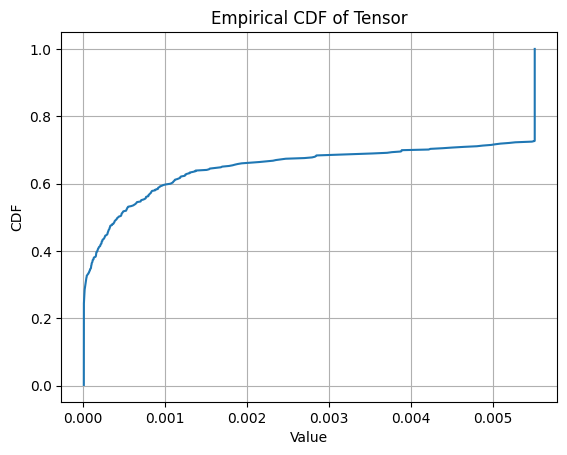

In [30]:
import torch
import matplotlib.pyplot as plt

# Example tensor
x = orn.flatten().detach().cpu()

# Sort values
x_sorted, _ = torch.sort(x)

# Compute cumulative probabilities
cdf = torch.arange(1, len(x_sorted)+1) / len(x_sorted)

# Plot
plt.plot(x_sorted.numpy(), cdf.numpy())
plt.xlabel("Value")
plt.ylabel("CDF")
plt.title("Empirical CDF of Tensor")
plt.grid(True)
plt.show()


In [6]:
x.shape,a.shape,b.shape,codes.shape,z.shape

(torch.Size([2, 1, 79280]),
 torch.Size([2, 512, 248]),
 torch.Size([2, 1, 78990]),
 torch.Size([2, 1, 248]),
 torch.Size([2, 1, 78990]))

In [4]:
x.shape,a.shape,b.shape,codes.shape,z.shape

(torch.Size([1, 1, 79280]),
 torch.Size([1, 512, 248]),
 torch.Size([1, 1, 78990]),
 torch.Size([1, 1, 248]),
 torch.Size([1, 1, 78990]))

In [ ]:

x = self.embed.last_attn[codes]
x = self.decoder(x)
return x

In [29]:
orn = at[0,:,100]

In [31]:
codes

tensor([[[14, 12,  6,  2,  6,  2,  2,  1,  1,  1,  1,  6,  1,  0,  0,  0,  4,
           0,  1,  1,  2,  4,  4,  4,  1,  2,  2,  0,  1,  0,  1,  0,  0,  1,
           1,  2,  0,  1,  1,  2,  4,  8,  1,  1,  0,  0,  0,  1,  1,  1,  0,
           0,  0,  2, 19,  1,  1,  1,  1,  2,  1,  1,  4,  2,  2,  2,  2,  2,
           2,  2,  2,  2,  2,  6,  1,  1,  1,  1,  1,  1,  2,  6,  1,  0, 11,
           0,  2,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  2,
           2,  5,  0,  2,  6,  3,  2,  2,  2,  1,  1,  1,  5,  0,  1,  6,  6,
          15,  2,  2,  2, 13,  1,  1,  6,  1,  0,  1,  0,  0,  6,  8,  2,  2,
           2,  2,  2,  2,  1,  1,  0,  1,  1,  1,  2,  1,  0,  0,  0,  0,  0,
           2,  4,  1,  1,  5,  0,  2,  1,  1,  2,  1,  2,  2,  0,  0,  1,  2,
          13,  0,  2,  1,  0,  2,  2,  1,  0,  2,  8,  0,  5,  2,  0,  1,  0,
           0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  5,  0,  0,
           2,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0

In [12]:
a.shape,b.shape

(torch.Size([1, 512, 248]), torch.Size([1, 1, 78990]))

In [10]:
y

tensor([[[247,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
           82,  82,  82,  82,  82,  82, 

In [7]:
y = model.debugencode(x)

RuntimeError: einsum(): the number of subscripts in the equation (3) does not match the number of dimensions (2) for operand 0 and no ellipsis was given

In [44]:
mmodel.quantizer.num_embeddings

1024

In [42]:
y.shape

torch.Size([1, 232, 8])

In [34]:
y.shape,y.dtype, z.shape, z.dtype, x.shape, x.dtype

(torch.Size([1, 232, 2]),
 torch.int64,
 torch.Size([1, 1, 68706]),
 torch.float32,
 torch.Size([1, 79280]),
 torch.float32)

In [36]:
232*8/68706

0.02701365237388292

In [4]:
y.shape

torch.Size([248, 512])

In [5]:
x.shape

torch.Size([1, 79280])

In [6]:
z.shape

torch.Size([1, 78990])

In [7]:
248*512/79280

1.601614530776993

In [8]:
x, sr = torchaudio.load('/ari/users/ibaskaya/projeler/sstream/data/testdata/908_157963_908-157963-0028.in.wav')
x, sr = torchaudio.functional.resample(x, sr, 16000), 16000
a = mmodel.encoder(x)
b = torch.transpose(a, -1, -2)
c, codes, codebook_loss = mmodel.quantizer(b)
d = torch.transpose(c, -1, -2)
e = mmodel.decoder(d)

In [9]:
tt = mmodel.quantizer.dequantize(codes.unsqueeze(0))

In [10]:
tt.shape

torch.Size([1, 248, 512])

In [11]:
d.shape

torch.Size([512, 248])

In [13]:
a.shape,b.shape,c.shape,d.shape,e.shape, codes.shape

(torch.Size([512, 248]),
 torch.Size([248, 512]),
 torch.Size([248, 512]),
 torch.Size([512, 248]),
 torch.Size([1, 78990]),
 torch.Size([248, 1]))

In [14]:
a.dtype,b.dtype,c.dtype,d.dtype,e.dtype, codes.dtype

(torch.float32,
 torch.float32,
 torch.float32,
 torch.float32,
 torch.float32,
 torch.int64)

In [4]:
import torch
def calc_entropy_loss(self, soft_weight=0.1, avg_weight=1.5) -> torch.Tensor:
    """
    Encourages:
      - Low entropy per-token attention (sharp choices).
      - High entropy of averaged attention (codebook diversity).
    """

    if not hasattr(self, "last_attn"):
        return torch.zeros((), device=next(self.parameters()).device)

    eps = self.eps

    # ---------- Per-token entropy (should be low) ----------
    attn_weights = self.last_attn  # (B, N, L)
    attn_weights = attn_weights / (attn_weights.sum(dim=1, keepdim=True) + eps)

    soft_entropy = -(attn_weights * torch.log(attn_weights + eps)).sum(dim=1)  # (B, L)
    soft_entropy = soft_entropy.mean()

    soft_loss = soft_weight * soft_entropy  # minimize

    # ---------- Average distribution entropy (should be high) ----------
    avg_dist = attn_weights.mean(dim=(0, 2))  # (N,)
    avg_dist = avg_dist / (avg_dist.sum() + eps)

    avg_entropy = -(avg_dist * torch.log(avg_dist + eps)).sum()
    avg_entropy = avg_entropy / math.log(self.num_embeddings)  # normalize to [0,1]

    avg_loss = -avg_weight * avg_entropy  # maximize

    # ---------- Combine ----------
    return soft_loss + avg_loss, avg_entropy, avg_loss, soft_entropy, soft_loss


In [3]:
import torch
import math

eps = 0.000001

# ---------- Per-token entropy (should be low) ----------
attn_weights = self.last_attn  # (B, N, L)
attn_weights = attn_weights / (attn_weights.sum(dim=1, keepdim=True) + eps)

soft_entropy = -(attn_weights * torch.log(attn_weights + eps)).sum(dim=1)  # (B, L)
soft_entropy = soft_entropy.mean()

soft_loss = soft_weight * soft_entropy  # minimize

# ---------- Average distribution entropy (should be high) ----------
avg_dist = attn_weights.mean(dim=(0, 2))  # (N,)
avg_dist = avg_dist / (avg_dist.sum() + eps)

avg_entropy = -(avg_dist * torch.log(avg_dist + eps)).sum()
avg_entropy = avg_entropy / math.log(10)  # normalize to [0,1]

avg_loss = -avg_weight * avg_entropy  # maximize





def entropy(p):
    p = p / (p.sum() + eps)
    return -(p * torch.log(p + eps)).sum()

# ---------- Soft entropy (no normalization) ----------
# Uniform distribution
uniform = torch.ones(N) / N
soft_uniform = entropy(uniform)

# One-hot distribution
one_hot = torch.zeros(N)
one_hot[0] = 1.0
soft_onehot = entropy(one_hot)

print("Soft entropy:")
print("  Min (one-hot):", soft_onehot.item())   # ~0
print("  Max (uniform):", soft_uniform.item()) # log(N)

# ---------- Average entropy (normalized) ----------
avg_uniform = entropy(uniform) / math.log(N)
avg_onehot = entropy(one_hot) / math.log(N)

print("\nAvg entropy (normalized):")
print("  Min (one-hot):", avg_onehot.item())   # 0
print("  Max (uniform):", avg_uniform.item()) # 1


Soft entropy:
  Min (one-hot): -0.0
  Max (uniform): 2.3025848865509033

Avg entropy (normalized):
  Min (one-hot): -0.0
  Max (uniform): 0.9999998807907104


In [8]:
u = torch.ones((1,10,1))/10
p = torch.zeros((1,10,1))
p[0,1,0] = 1

In [9]:
u,p

(tensor([[[0.1000],
          [0.1000],
          [0.1000],
          [0.1000],
          [0.1000],
          [0.1000],
          [0.1000],
          [0.1000],
          [0.1000],
          [0.1000]]]),
 tensor([[[0.],
          [1.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.]]]))

In [25]:
import torch
import math

N = 6
eps = 1e-8

uu=torch.ones((3,N,2))/N
pp = torch.zeros((3,N,2))
pp[0,0,0],pp[1,1,0],pp[2,2,0],pp[0,3,1],pp[1,4,1],pp[2,5,1] = 1,1,1,1,1,1

eps = 0.000001
soft_weight, avg_weight = 1, 1

# ---------- Per-token entropy (should be low) ----------
attn_weights = pp
attn_weights = attn_weights / (attn_weights.sum(dim=1, keepdim=True) + eps)

soft_entropy = -(attn_weights * torch.log(attn_weights + eps)).sum(dim=1)  # (B, L)
soft_entropy = soft_entropy.mean()

soft_loss = soft_weight * soft_entropy  # minimize

# ---------- Average distribution entropy (should be high) ----------
avg_dist = attn_weights.mean(dim=(0, 2))  # (N,)
avg_dist = avg_dist / (avg_dist.sum() + eps)

avg_entropy = -(avg_dist * torch.log(avg_dist + eps)).sum()

avg_loss = -avg_weight * avg_entropy  # maximize

In [26]:
avg_entropy, soft_entropy

(tensor(1.7918), tensor(0.))

In [16]:
math.log(10)

2.302585092994046